# Nobel Prize analysis

## Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictated that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Dataset was scraped by Dr. Angela Yu in 2020. The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown and they were substituted with mid-year estimate of July 2nd.

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

## Data Exploration & Cleaning

* Shape of the DataFrame
* Column names
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
df_data.shape

(962, 16)

In [5]:
df_data.head()

year    category                                           prize   
0  1901   Chemistry               The Nobel Prize in Chemistry 1901  \
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share   
0  "in recognition of the extraordinary services ...         1/1  \
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city   
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam  \
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name   
0       Netherlands           Netherlands  Male   Berlin University  \
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [6]:
df_data.tail()

year  category                                           prize   
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020  \
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share   
957           “for the discovery of Hepatitis C virus”         1/3  \
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name  birth_date   
957    Individual            Michael Houghton  1949-07-02  \
958  Organization  World Food Programme (WFP)         NaN   
959    Individual                 Andrea Ghez  1965-06-16   
960    Individual             Reinhard Genzel  1952-03-24   
961    Individual               Roger Penrose  1931-08-08   

                   birth_city             birth_country   
957                       NaN            United Kingdom  \
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name   
957            United Kingdom    Male     University of Alberta  \
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  
957          Edmonton                    Canada  GBR  
958               NaN                       NaN  NaN  
959      Berkeley, CA  United States of America  USA  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

## Check for Duplicates

In [8]:
df_data.duplicated().values.any()

False

## Check for NaN Values

In [9]:
df_data.isna().values.any()

True

In [10]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [11]:
# Selecting several columns with NaN values
col_subset = ["year", "category", "laureate_type", "birth_date", "full_name", "organization_name"]
df_data.loc[df_data.birth_date.isna()][col_subset]

year category laureate_type birth_date   
24   1904    Peace  Organization        NaN  \
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

In [12]:
col_subset = ["year", "category", "laureate_type", "full_name", "organization_name"]
df_data.loc[df_data.organization_name.isna()][col_subset]

year    category laureate_type                           full_name   
1    1901  Literature    Individual                     Sully Prudhomme  \
3    1901       Peace    Individual                      Frédéric Passy   
4    1901       Peace    Individual                   Jean Henry Dunant   
7    1902  Literature    Individual  Christian Matthias Theodor Mommsen   
9    1902       Peace    Individual                Charles Albert Gobat   
..    ...         ...           ...                                 ...   
932  2018       Peace    Individual                         Nadia Murad   
942  2019  Literature    Individual                        Peter Handke   
946  2019       Peace    Individual                      Abiy Ahmed Ali   
954  2020  Literature    Individual                        Louise Glück   
958  2020       Peace  Organization          World Food Programme (WFP)   

    organization_name  
1                 NaN  
3                 NaN  
4                 NaN  
7                 NaN  
9                 NaN  
..                ...  
932               NaN  
942               NaN  
946               NaN  
954               NaN  
958               NaN  

[255 rows x 5 columns]

## Type Conversions

* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage

### Convert Year and Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

### Add a Column with the Prize Share as a Percentage

In [14]:
separated_values = df_data.prize_share.str.split('/', expand=True)
df_data["share_pct"] = (pd.to_numeric(separated_values[0])) / (pd.to_numeric(separated_values[1]))

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [16]:
df_data.head()

year    category                                           prize   
0  1901   Chemistry               The Nobel Prize in Chemistry 1901  \
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share   
0  "in recognition of the extraordinary services ...         1/1  \
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city   
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam  \
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name   
0       Netherlands           Netherlands  Male   Berlin University  \
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

## Plotly Donut Chart: Percentage of Male vs. Female Laureates

Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women.

In [17]:
gender = df_data.sex.value_counts()
fig = px.pie(labels=gender.index,
             values=gender.values,
             title='Percentage of Male vs. Female Winners',
             names=gender.index,
             hole=0.4)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")
fig.show()

## Who were the first 3 Women to Win the Nobel Prize?

In [18]:
women_data = df_data[df_data["sex"] == "Female"]
women_data.sort_values('year').head(3)

year    category                               prize   
18  1903     Physics     The Nobel Prize in Physics 1903  \
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share   
18  "in recognition of the extraordinary services ...         1/4  \
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name   
18    Individual                        Marie Curie, née Sklodowska  \
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country   
18 1867-11-07     Warsaw           Russian Empire (Poland)  \
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city   
18                Poland  Female               NaN               NaN  \
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

## Find the Repeat Winners

In [19]:
df_data[df_data.duplicated(subset=['full_name'], keep=False)]

year   category                              prize   
18   1903    Physics    The Nobel Prize in Physics 1903  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share   
18   "in recognition of the extraordinary services ...         1/4  \
62   "in recognition of her services to the advance...         1/1   
89                                                 NaN         1/1   
215                                                NaN         1/1   
278  "for his research into the nature of the chemi...         1/1   
283                                                NaN         1/1   
297  "for their researches on semiconductors and th...         1/3   
306  "for his work on the structure of proteins, es...         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name   
18     Individual                        Marie Curie, née Sklodowska  \
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country   
18  1867-11-07        Warsaw   Russian Empire (Poland)  \
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex   
18                     Poland  Female  \
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United States of America    Male   
283                       NaN     NaN   
297  United States of America    Male   
306            United Kingdom    Male   
340  U

In [20]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
multiple_winners[col_subset]

year   category laureate_type   
18   1903    Physics    Individual  \
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

## Number of Prizes per Category

* In how many categories are prizes awarded?
* Which category has the most/fewest number of prizes awarded?

In [21]:
prizes_per_category = df_data.category.value_counts()

In [22]:
bar = px.bar(x=prizes_per_category.index,
             y=prizes_per_category.values,
             color=prizes_per_category.values,
             color_continuous_scale='Aggrnyl',
             title="Number of Prizes Awarded per Category")
bar.update_layout(xaxis_title='Nobel Prize Category',
                  yaxis_title='Number of Prizes',
                  coloraxis_showscale=False)
bar.show()

* When was the first prize in the field of Economics awarded and who won it?

In [23]:
economy_data = df_data[df_data["category"] == "Economics"]
economy_data.sort_values('year').head(3)

year   category                                              prize   
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...  \
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share   
393  "for having developed and applied dynamic mode...         1/2  \
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city   
393    Individual      Jan Tinbergen 1903-04-12  the Hague  \
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex   
393               Netherlands               Netherlands  Male  \
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city   
393          The Netherlands School of Economics         Rotterdam  \
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00

## Male and Female Winners by Category

Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.

In [24]:
men_women = df_data.groupby(["sex", "category"], as_index=False).agg({'prize': pd.Series.count})

In [25]:
men_women.sort_values('prize', ascending=False, inplace=True)

In [26]:
vbar = px.bar(x=men_women.category,
              y=men_women.prize,
              color=men_women.sex,
              title="Number of Prizes Awarded per Category split by Men and Women")
vbar.update_layout(xaxis_title="Nobel Prize Category",
                   yaxis_title="Number of Prizes")
vbar.show()

## Number of Prizes Awarded Over Time

* Show the trend in awards over time visually.
* Create a 5 year rolling average of the number of prizes.

In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [28]:
prizes_num = df_data.groupby(by='year').count().prize
prizes_num

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [29]:
moving_avg = prizes_num.rolling(window=5).mean()

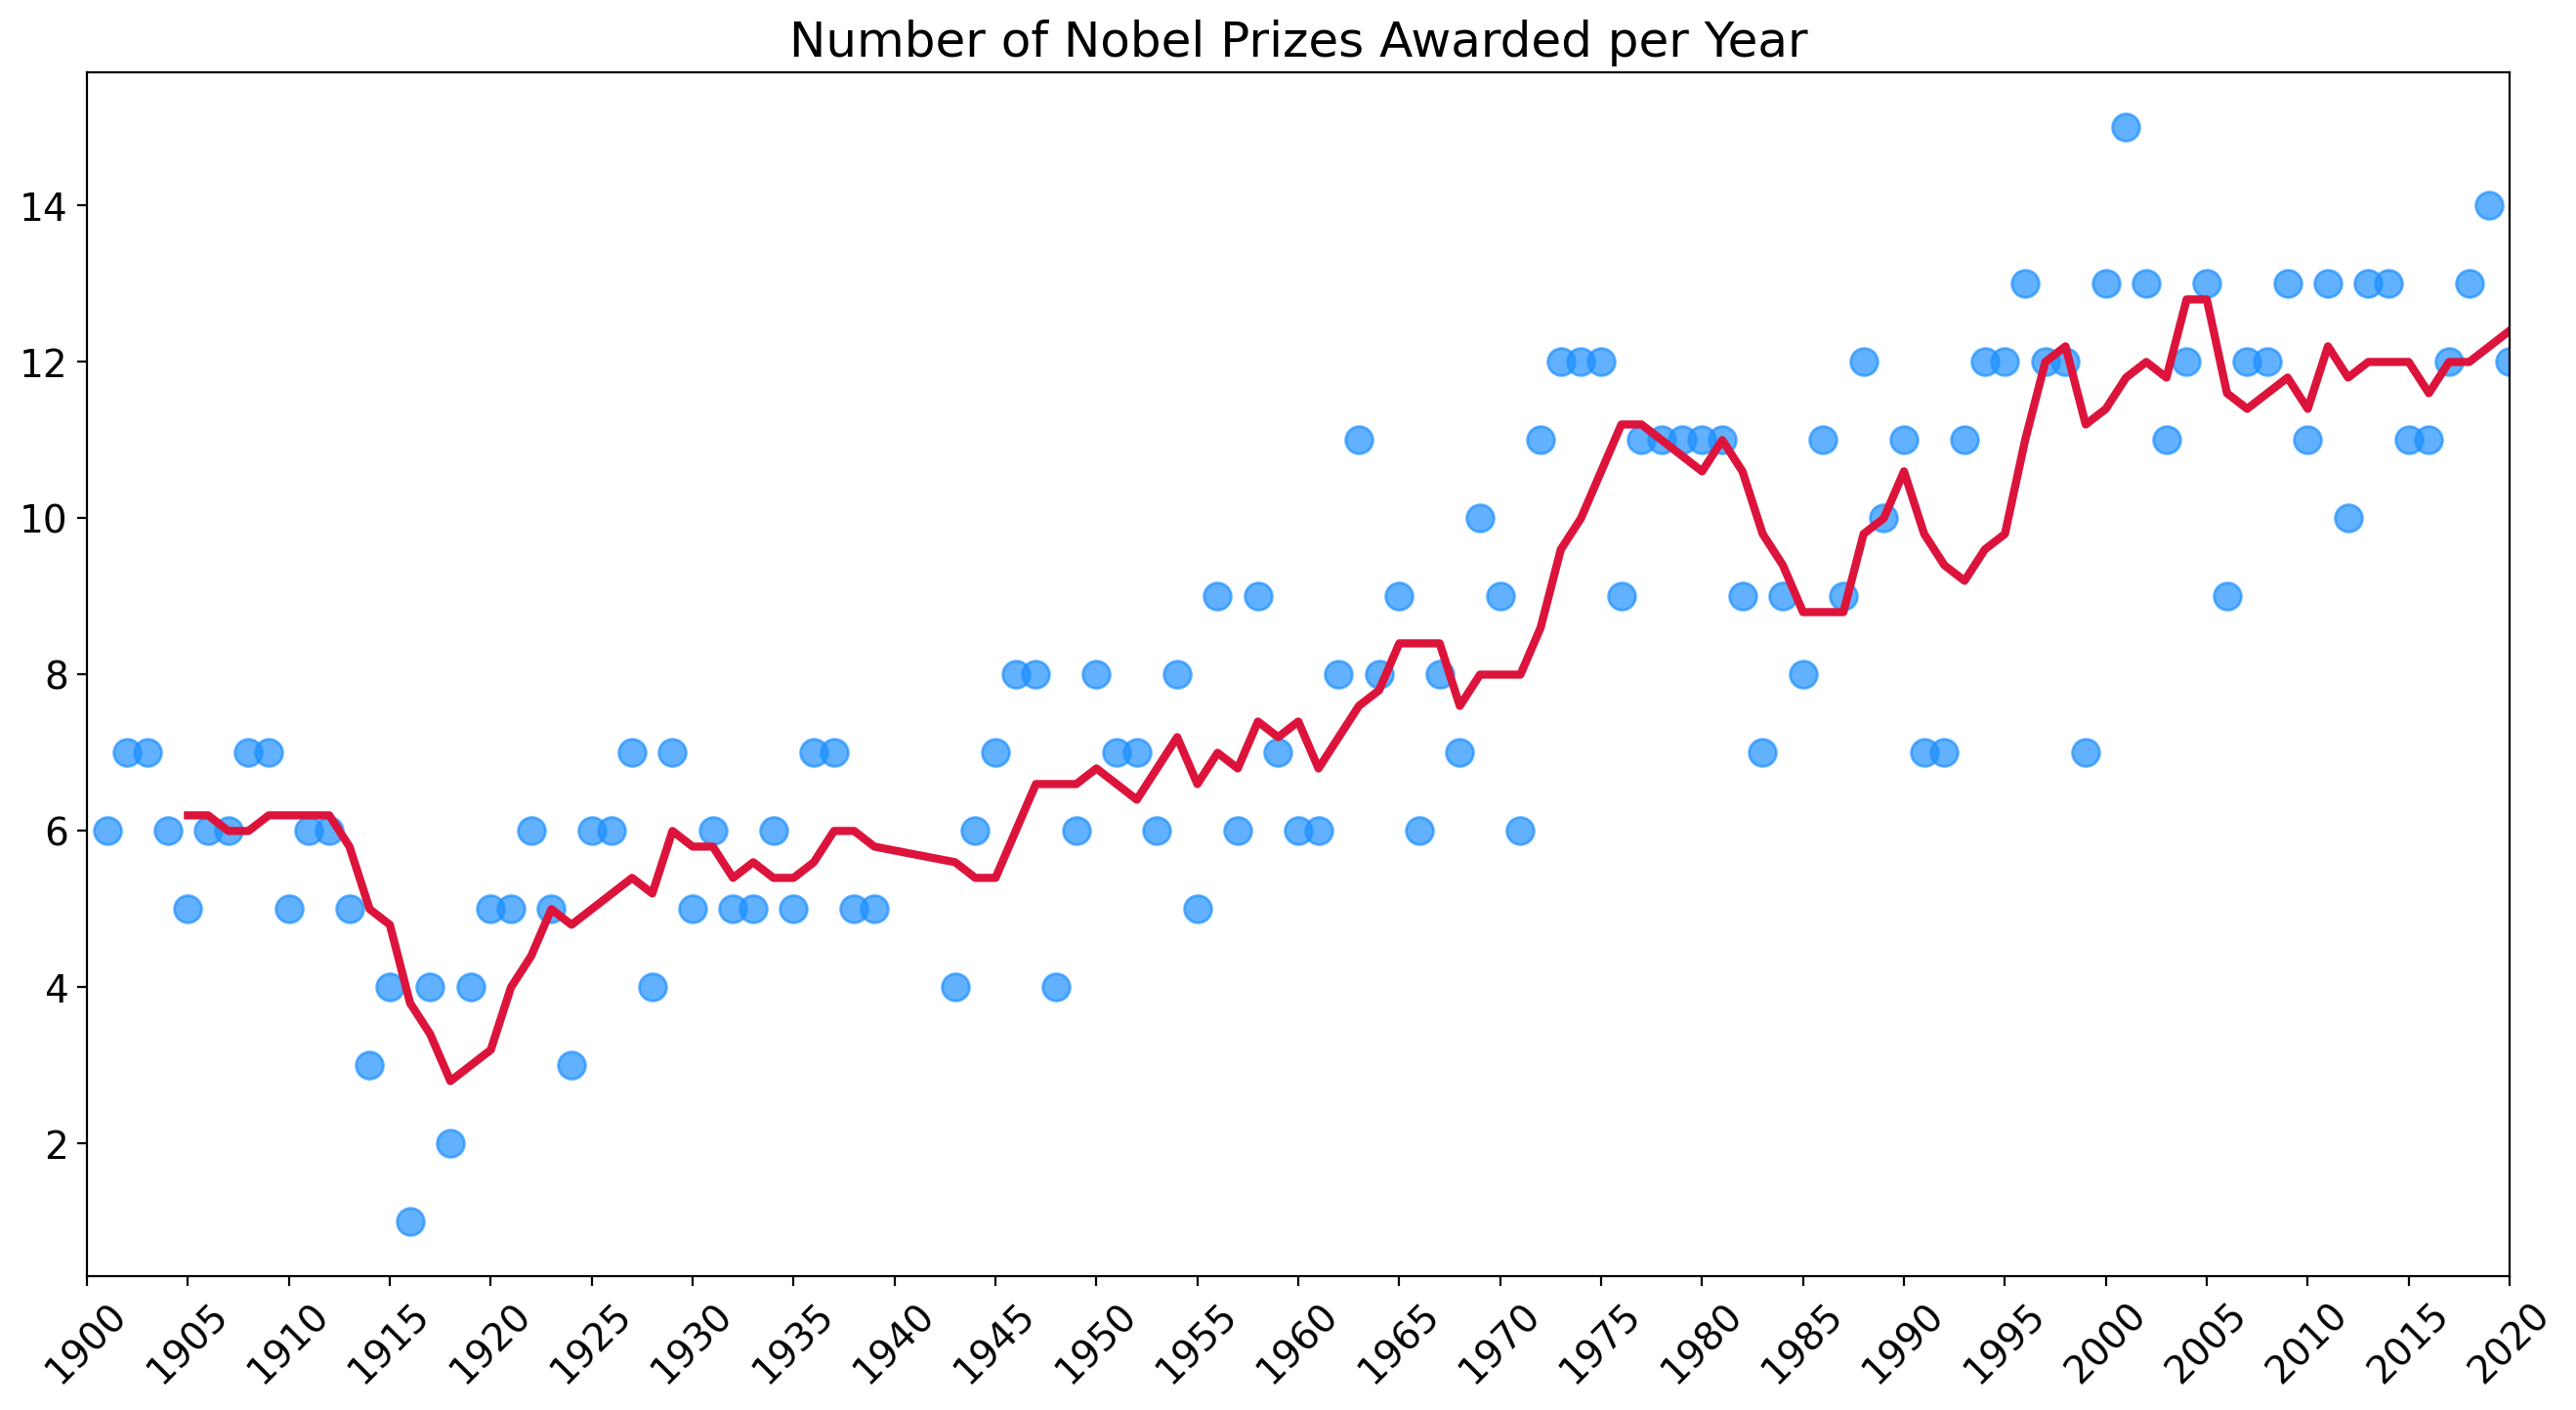

In [30]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

# Get current axis
ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(x=prizes_num.index,
            y=prizes_num.values,
            c='dodgerblue',
            alpha=0.7,
            s=100)

ax.plot(prizes_num.index,
         moving_avg.values,
         c='crimson',
         linewidth=3)

plt.show()

## Are More Prizes Shared Than Before?

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Plot the rolling average of the prize share on the chart.

In [31]:
yearly_avg_share = df_data.groupby("year").agg({'share_pct': pd.Series.mean})

In [32]:
share_moving_average = yearly_avg_share.rolling(window=5).mean()

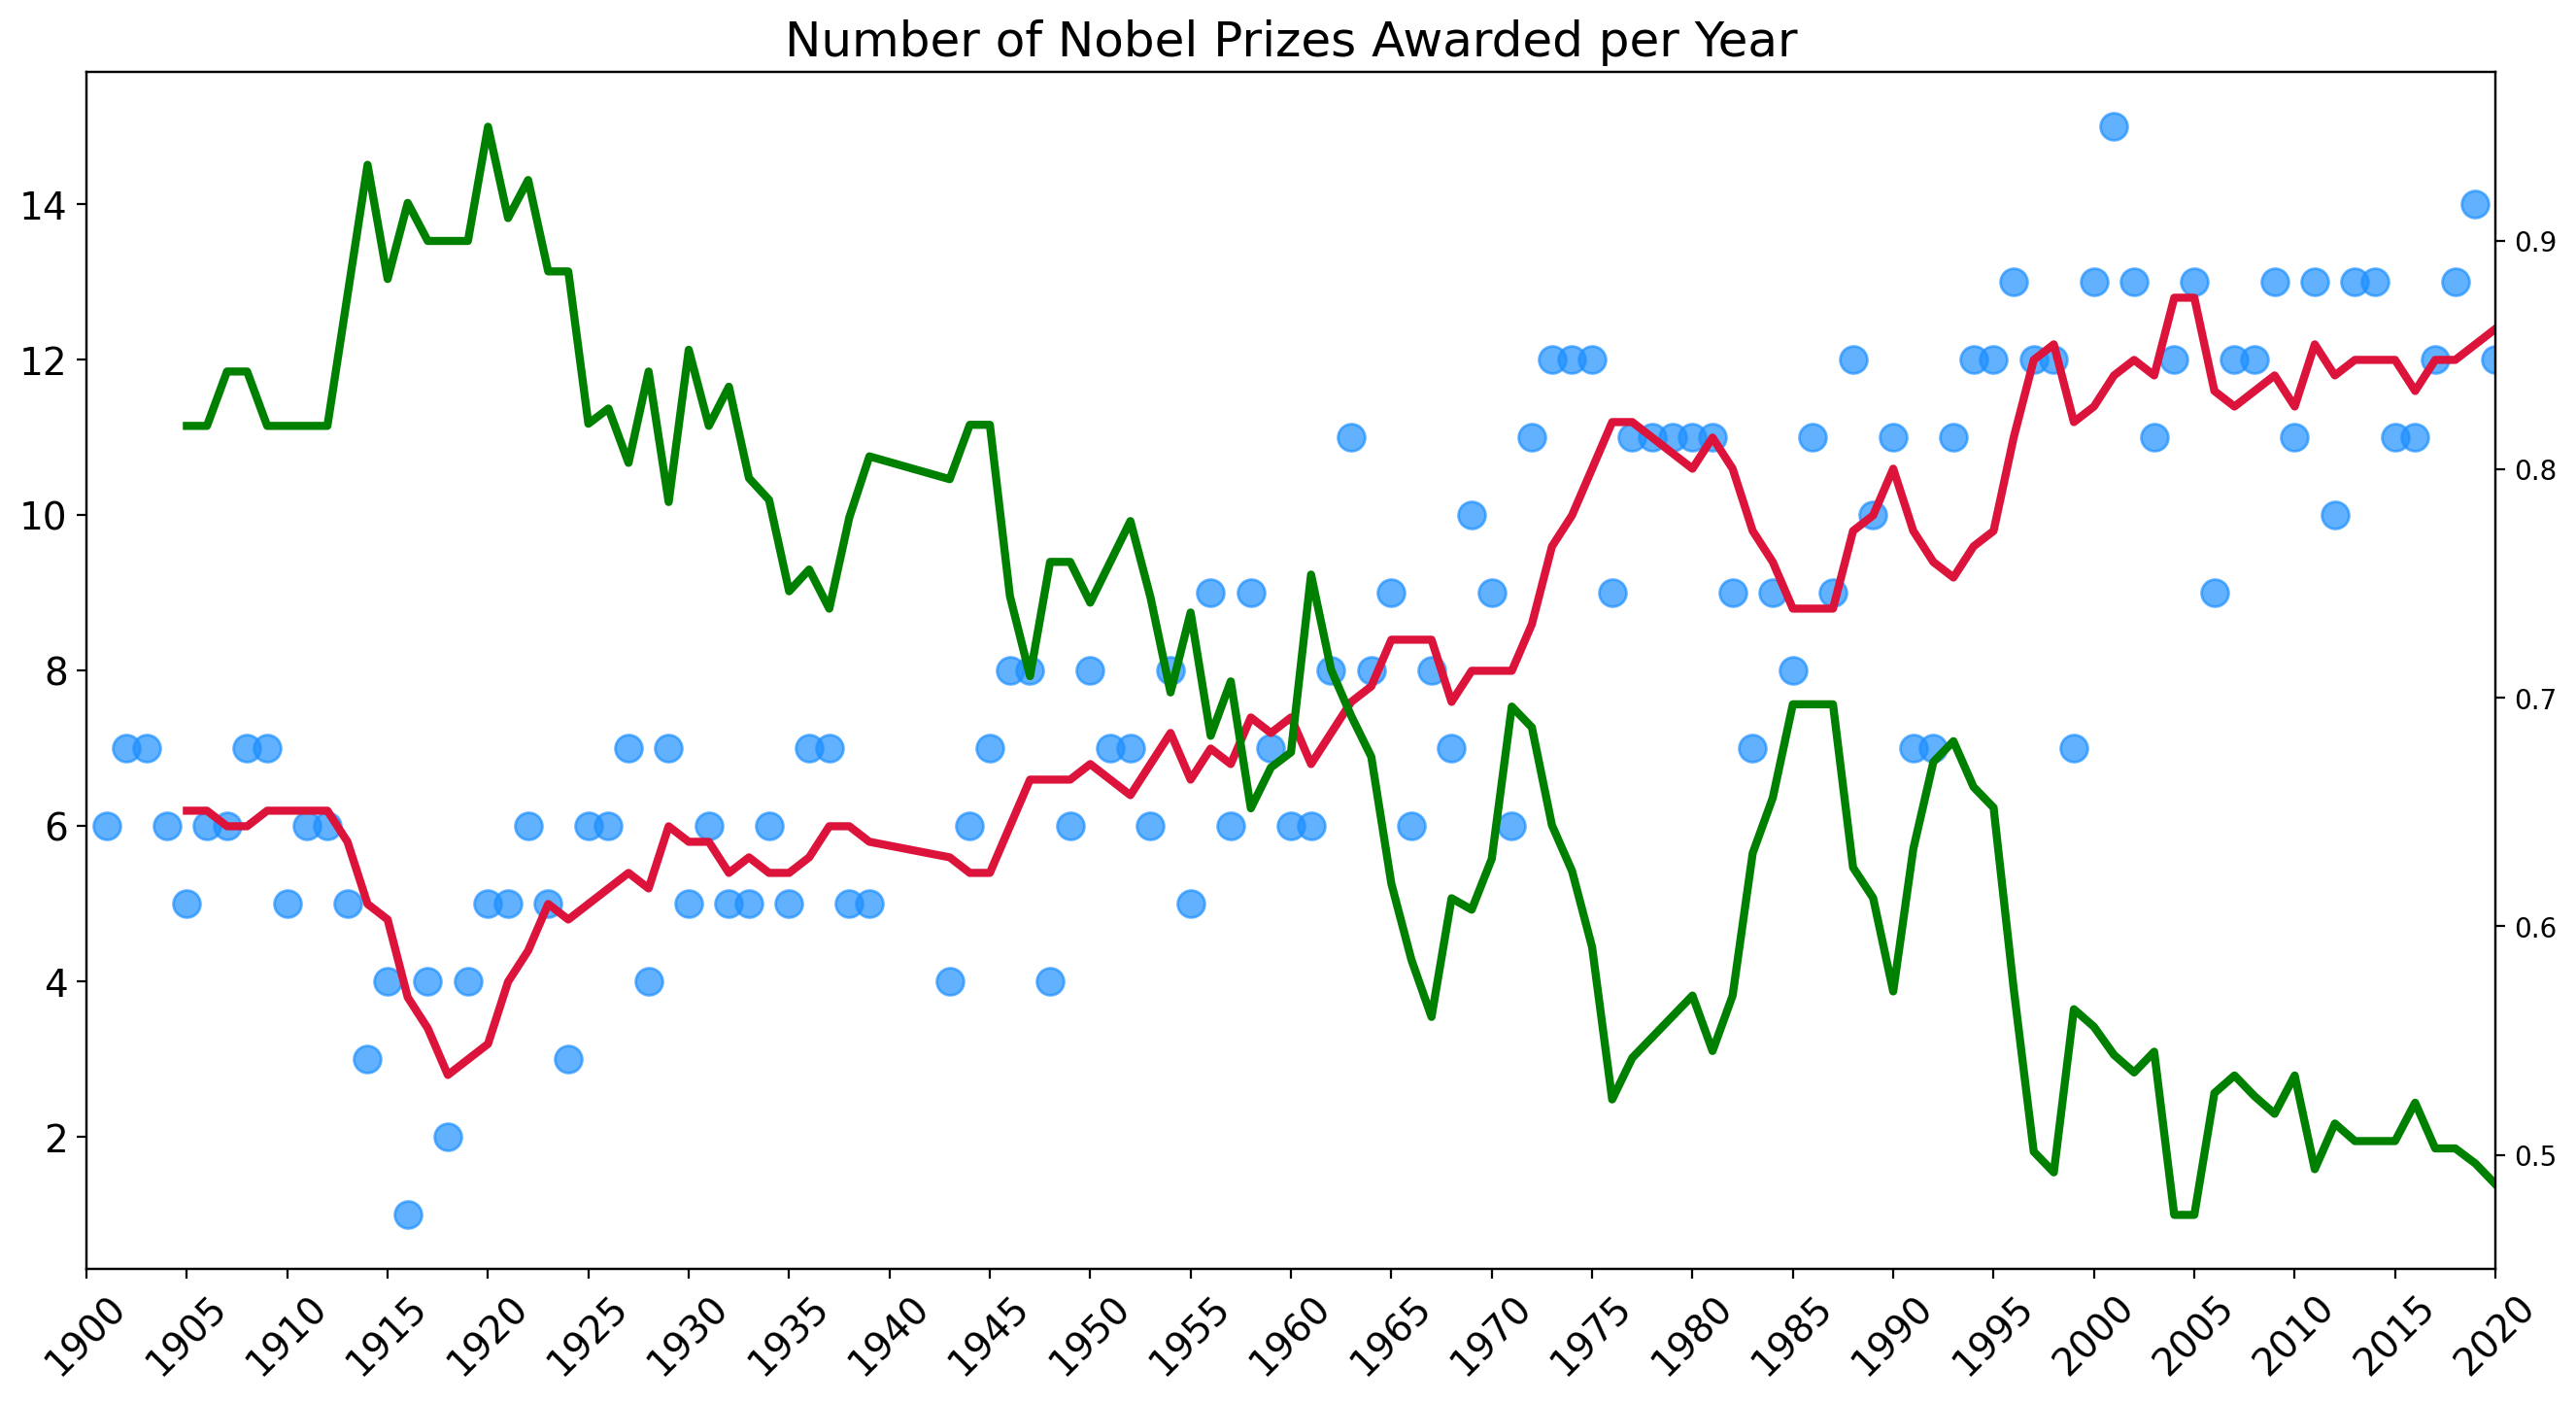

In [33]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

# Get current axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prizes_num.index,
            y=prizes_num.values,
            c='dodgerblue',
            alpha=0.7,
            s=100)

ax1.plot(prizes_num.index,
         moving_avg.values,
         c='crimson',
         linewidth=3)

ax2.plot(prizes_num.index,
         share_moving_average.values,
         c='green',
         linewidth=3)

plt.show()

Invert the secondary axis to see the relationship between the number of prizes and the laureate share more clearly.

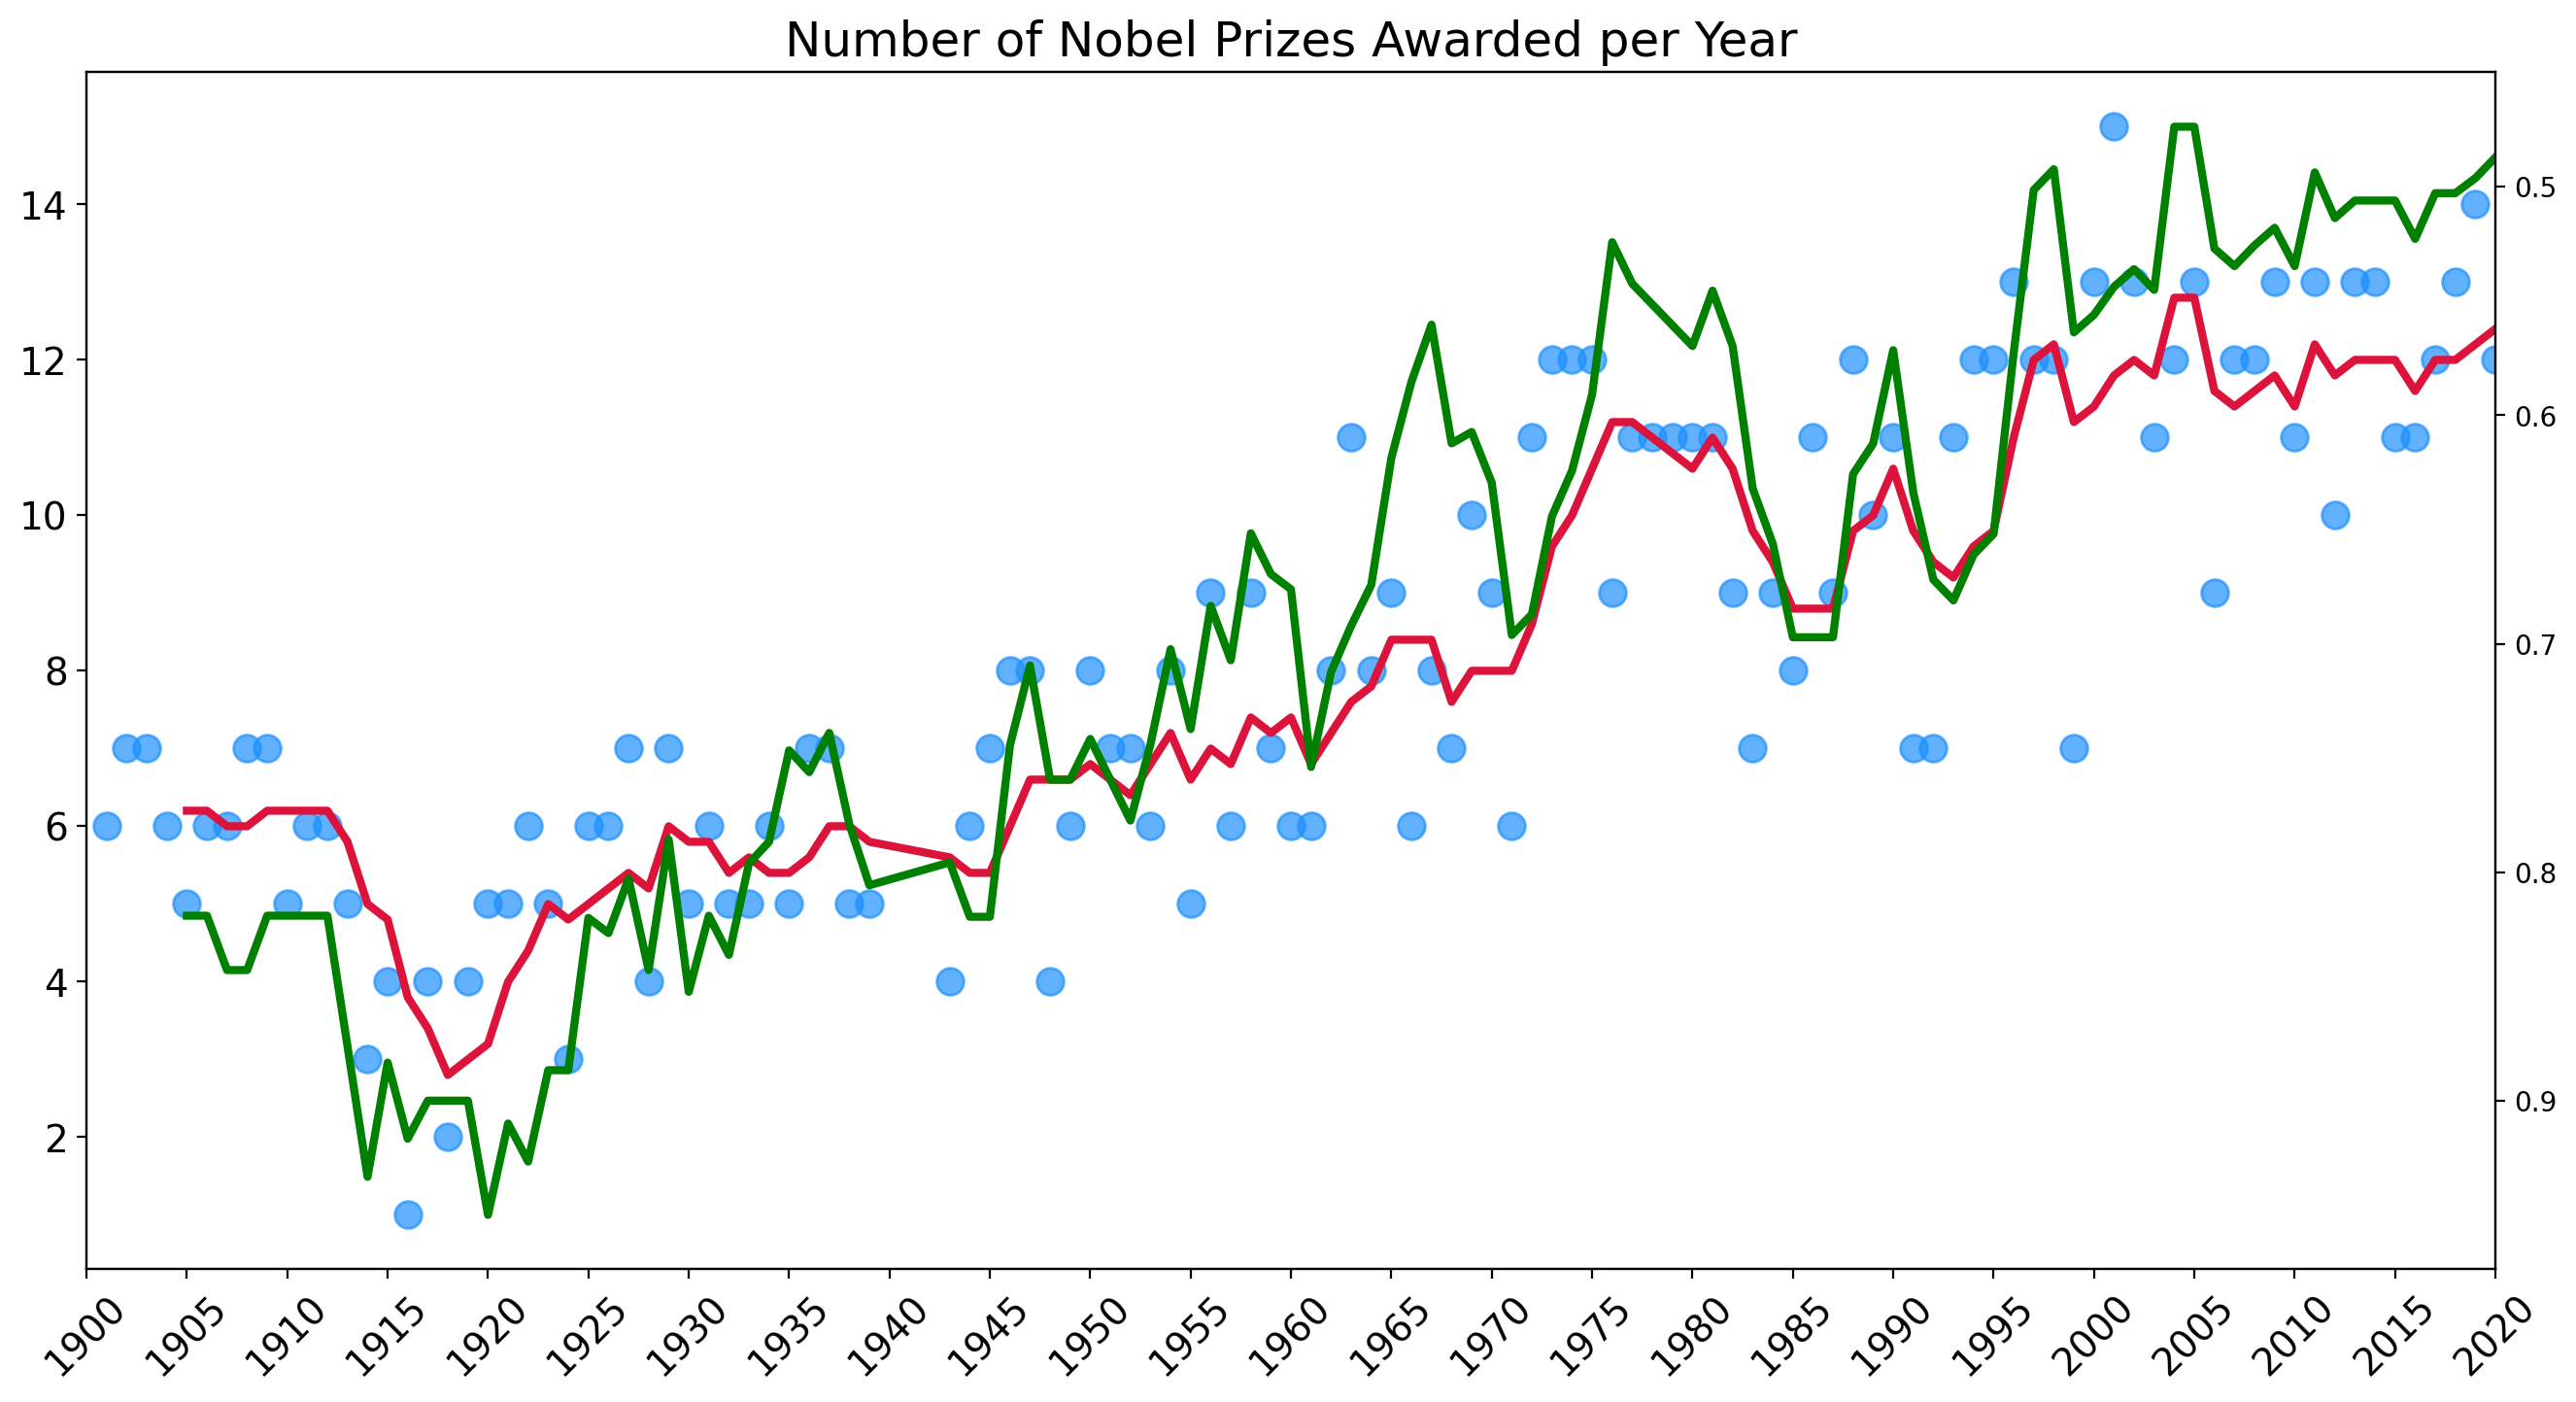

In [34]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)
plt.yticks(fontsize=14)

# Get current axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
ax2.invert_yaxis()

ax1.scatter(x=prizes_num.index,
            y=prizes_num.values,
            c='dodgerblue',
            alpha=0.7,
            s=100)

ax1.plot(prizes_num.index,
         moving_avg.values,
         c='crimson',
         linewidth=3)

ax2.plot(prizes_num.index,
         share_moving_average.values,
         c='green',
         linewidth=3)

plt.show()

## The Countries with the Most Nobel Prizes

Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won and the `birth_country_current` column.

In [35]:
top_countries = df_data.groupby("birth_country_current", as_index=False).agg({'prize': pd.Series.count})
top_countries

birth_country_current  prize
0                    Algeria      2
1                  Argentina      4
2                  Australia     10
3                    Austria     18
4                 Azerbaijan      1
..                       ...    ...
74  United States of America    281
75                 Venezuela      1
76                   Vietnam      1
77                     Yemen      1
78                  Zimbabwe      1

[79 rows x 2 columns]

In [36]:
top_countries.sort_values("prize", inplace=True)

In [37]:
top20_countries = top_countries[-20:]
top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

In [38]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               title="Top 20 Countries by Number of Prizes",
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale="Viridis")

h_bar.update_layout(xaxis_title="Number of Prizes",
                    yaxis_title="Country",
                    coloraxis_showscale=False)
h_bar.show()

## Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/).

In [39]:
df_countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({'prize': pd.Series.count})

In [40]:
df_countries.sort_values('prize', ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [41]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize',
                          hover_name='birth_country_current',
                          color_continuous_scale=px.colors.sequential.Purpor)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

## In Which Categories are the Different Countries Winning Prizes?

* Group the data by country and category.
* Create a DataFrame with columns `birth_country_current`, `category`, `cat_prize`, `total_prize`.
* Divide the plotly bar chart to show which categories made up the total number of prizes.

In [42]:
country_cat = df_data.groupby(["birth_country_current", "category"],
                                as_index=False).agg({'prize': pd.Series.count})

In [43]:
country_cat.sort_values(by='prize', inplace=True, ascending=False)

In [44]:
country_cat

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [45]:
merged_df = pd.merge(country_cat, top20_countries, on='birth_country_current')

In [46]:
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']

In [47]:
merged_df.sort_values(by='total_prize', inplace=True)

In [48]:
merged_df

birth_country_current   category  cat_prize  total_prize
109                     India    Physics          1            9
108                     India      Peace          1            9
88                    Belgium      Peace          3            9
89                    Belgium   Medicine          3            9
90                    Belgium  Chemistry          1            9
..                        ...        ...        ...          ...
4    United States of America      Peace         19          281
3    United States of America  Economics         49          281
2    United States of America  Chemistry         55          281
1    United States of America    Physics         70          281
0    United States of America   Medicine         78          281

[110 rows x 4 columns]

In [49]:
cat_bar = px.bar(x=merged_df.cat_prize,
               y=merged_df.birth_country_current,
               title="Top 20 Countries by Number of Prizes and Categories",
               orientation='h',
               color=merged_df.category)

cat_bar.update_layout(xaxis_title="Number of Prizes",
                    yaxis_title="Country")
cat_bar.show()

## Number of Prizes Won by Each Country Over Time

* Calculate the cumulative number of prizes won by each country in every year.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

In [50]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year

birth_country_current  year  category  prize  motivation  prize_share   
0                     Algeria  1957         1      1           1            1  \
1                     Algeria  1997         1      1           1            1   
2                   Argentina  1936         1      1           0            1   
3                   Argentina  1947         1      1           1            1   
4                   Argentina  1980         1      1           0            1   
..                        ...   ...       ...    ...         ...          ...   
622  United States of America  2020         7      7           7            7   
623                 Venezuela  1980         1      1           1            1   
624                   Vietnam  1973         1      1           0            1   
625                     Yemen  2011         1      1           1            1   
626                  Zimbabwe  1960         1      1           0            1   

     laureate_type  full_name  birth_date  birth_city  birth_country  sex   
0                1          1           1           1              1    1  \
1                1          1           1           1              1    1   
2                1          1           1           1              1    1   
3                1          1           1           1              1    1   
4                1          1           1           1              1    1   
..             ...        ...         ...         ...            ...  ...   
622              7          7           7           7              7    7   
623              1          1           1           1              1    1   
624              1          1           1           1              1    1   
625              1          1           1           1              1    1   
626              1          1           1           1              1    1   

     organization_name  organization_city  organization_country  ISO   
0                    0                  0                     0    1  \
1                    1                  1                     1    1   
2                    0                  0                     0    1   
3                    1                  1                     1    1   
4                    0                  0                     0    1   
..                 ...                ...                   ...  ...   
622                  6                  6                     6    7   
623                  1                  1                     1    1   
624                  0                  0                     0    1   
625                  0                  0                     0    1   
626                  0                  0                     0    1   

     share_pct  
0            1  
1            1  
2            1  
3            1  
4            1  
..         ...  
622          7  
623          1  
624          1  
625          1  
626          1  

[627 rows x 17 columns]

In [51]:
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [52]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      2
Argentina                1936      1
                         1947      2
                         1980      3
...                              ...
United States of America 2020    281
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

In [53]:
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [54]:
line_chart = px.line(cumulative_prizes,
                     x='year',
                     y='prize',
                     color='birth_country_current',
                     hover_name='birth_country_current')
line_chart.update_layout(xaxis_title='Year',
                         yaxis_title='Number of Prizes')
line_chart.show()

## What are the Top Research Organisations?

Create a bar chart showing the organisations affiliated with the Nobel laureates.

In [55]:
top_organizations = df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count})
top_organizations

organization_name  prize
0               A.F. Ioffe Physico-Technical Institute      1
1                                    Aarhus University      1
2                                  Academy of Sciences      3
3                                 Amsterdam University      2
4                          Argonne National Laboratory      1
..                                                 ...    ...
259       École Nationale Supérieur des Mines de Paris      1
260                           École Normale Supérieure      1
261                                École Polytechnique      2
262             École Supérieure de Physique et Chimie      1
263  École municipale de physique et de chimie indu...      1

[264 rows x 2 columns]

In [56]:
top_organizations = top_organizations.sort_values('prize')

In [57]:
top20_organizations = top_organizations[-20:]
top20_organizations

organization_name  prize
79                               Institut Pasteur      7
109                             London University      7
67                         Harvard Medical School      7
192                     University College London      7
40                             Cornell University      8
12                              Bell Laboratories      8
258                               Yale University      9
111           MRC Laboratory of Molecular Biology     10
222                          University of Oxford     12
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
146                          Princeton University     15
38                            Columbia University     17
26   California Institute of Technology (Caltech)     17
197                       University of Cambridge     18
198                         University of Chicago     20
117   Massachusetts Institute of Technology (MIT)     21
167                           Stanford University     23
68                             Harvard University     29
196                      University of California     40

In [58]:
org_bar = px.bar(x=top20_organizations.prize,
                 y=top20_organizations.organization_name,
                 color=top20_organizations.prize,
                 orientation='h',
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

## Which Cities Make the Most Discoveries?

In [59]:
top20_org_cities = df_data["organization_city"].value_counts()[:20]

In [60]:
top20_org_cities.sort_values(inplace=True)
top20_org_cities

organization_city
Ithaca, NY          8
Los Angeles, CA     8
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Moscow             10
Stockholm          10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: count, dtype: int64

In [61]:
org_bar = px.bar(x=top20_org_cities.values,
                 y=top20_org_cities.index,
                 color=top20_org_cities.values,
                 orientation='h',
                 color_continuous_scale=px.colors.sequential.Sunsetdark,
                 title='Which Cities Do the Most Research?')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='City',
                      coloraxis_showscale=False)
org_bar.show()

## Where are Nobel Laureates Born?

In [62]:
top20_birth_cities = df_data["birth_city"].value_counts()[:20]
top20_birth_cities.sort_values(inplace=True)
top20_birth_cities

birth_city
Ann Arbor, MI             3
Montreal                  4
Cairo                     4
Pittsburgh, PA            4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Moscow                    7
Munich                    7
Budapest                  8
Brooklyn, NY              8
Washington, DC            8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: count, dtype: int64

In [63]:
org_bar = px.bar(x=top20_birth_cities.values,
                 y=top20_birth_cities.index,
                 color=top20_birth_cities.values,
                 orientation='h',
                 color_continuous_scale=px.colors.sequential.Plasma,
                 title='Where were the Nobel Laureates Born?')

org_bar.update_layout(xaxis_title='Number of Prizes',
                      yaxis_title='City of Birth',
                      coloraxis_showscale=False)
org_bar.show()

## Plotly Sunburst Chart: Combine Country, City, and Organisation

* Create a DataFrame that groups the number of prizes by organisation.
* Use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)

In [64]:
country_city_org = df_data.groupby(by=['organization_country', 'organization_city', 'organization_name'],
                               as_index=False).agg({'prize': pd.Series.count})
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

organization_country     organization_city   
205  United States of America         Cambridge, MA  \
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [65]:
burst = px.sunburst(country_city_org,
                    path=['organization_country', 'organization_city', 'organization_name'],
                    values='prize',
                    title='Where do Discoveries Take Place?')
burst.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='City',
                    coloraxis_showscale=False)
burst.show()

## Patterns in the Laureate Age at the Time of the Award

In [66]:
birth_years = df_data['birth_date'].dt.year

In [67]:
df_data['winning_age'] = df_data.year - birth_years

In [68]:
df_data.head()

year    category                                           prize   
0  1901   Chemistry               The Nobel Prize in Chemistry 1901  \
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share   
0  "in recognition of the extraordinary services ...         1/1  \
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city   
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam  \
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name   
0       Netherlands           Netherlands  Male   Berlin University  \
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

## Who were the oldest and youngest winners?

Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning.

In [69]:
display(df_data.nlargest(n=1, columns='winning_age'))

year   category                              prize   
937  2019  Chemistry  The Nobel Prize in Chemistry 2019  \

                                         motivation prize_share laureate_type   
937  “for the development of lithium-ion batteries”         1/3    Individual  \

           full_name birth_date birth_city birth_country   
937  John Goodenough 1922-07-25       Jena       Germany  \

    birth_country_current   sex    organization_name organization_city   
937               Germany  Male  University of Texas         Austin TX  \

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU       0.33        97.00

In [70]:
display(df_data.nsmallest(n=1, columns='winning_age'))

year category                       prize   
885  2014    Peace  The Nobel Peace Prize 2014  \

                                            motivation prize_share   
885  "for their struggle against the suppression of...         1/2  \

    laureate_type         full_name birth_date birth_city birth_country   
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan  \

    birth_country_current     sex organization_name organization_city   
885              Pakistan  Female               NaN               NaN  \

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK       0.50        17.00

## Descriptive Statistics for the Laureate Age at Time of Award

In [71]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

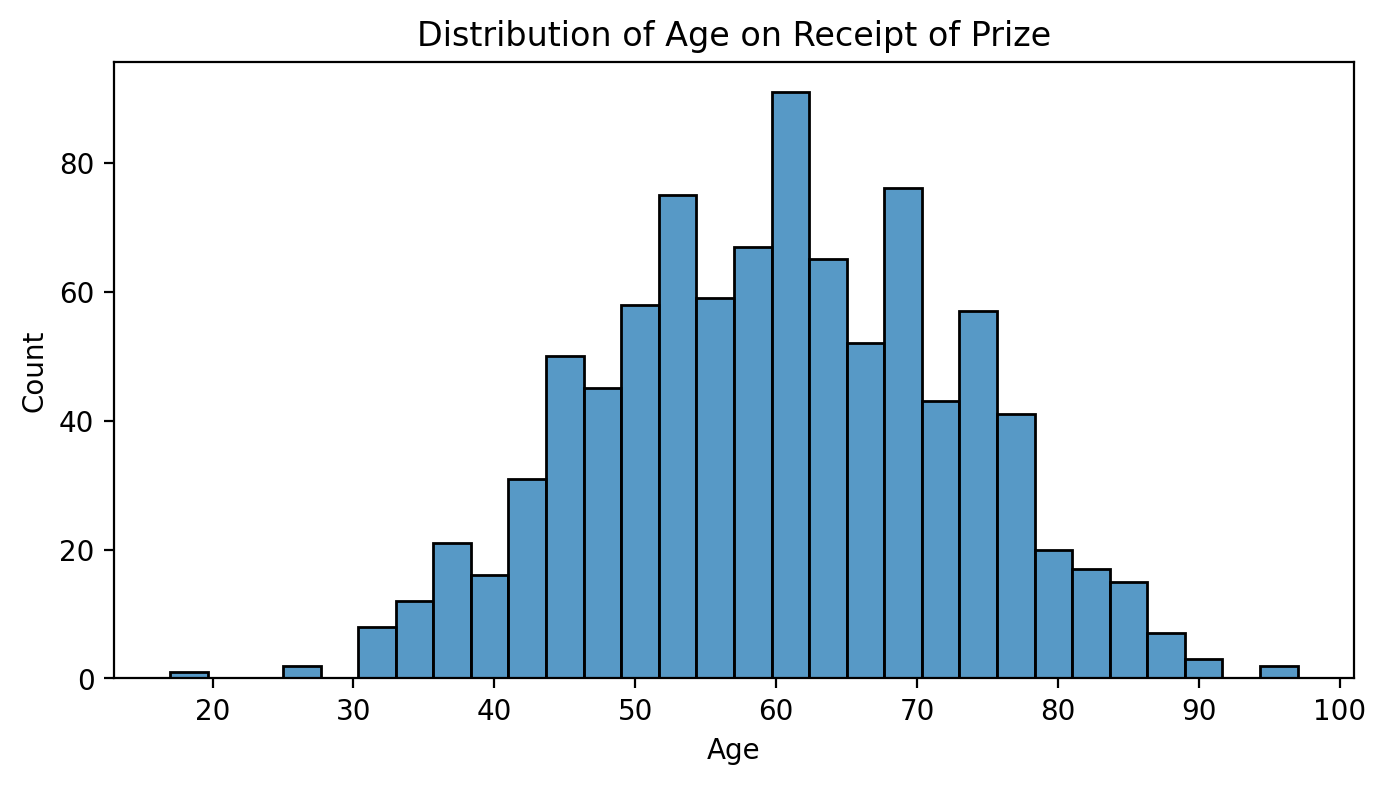

In [72]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

## Age at Time of Award throughout History

Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.

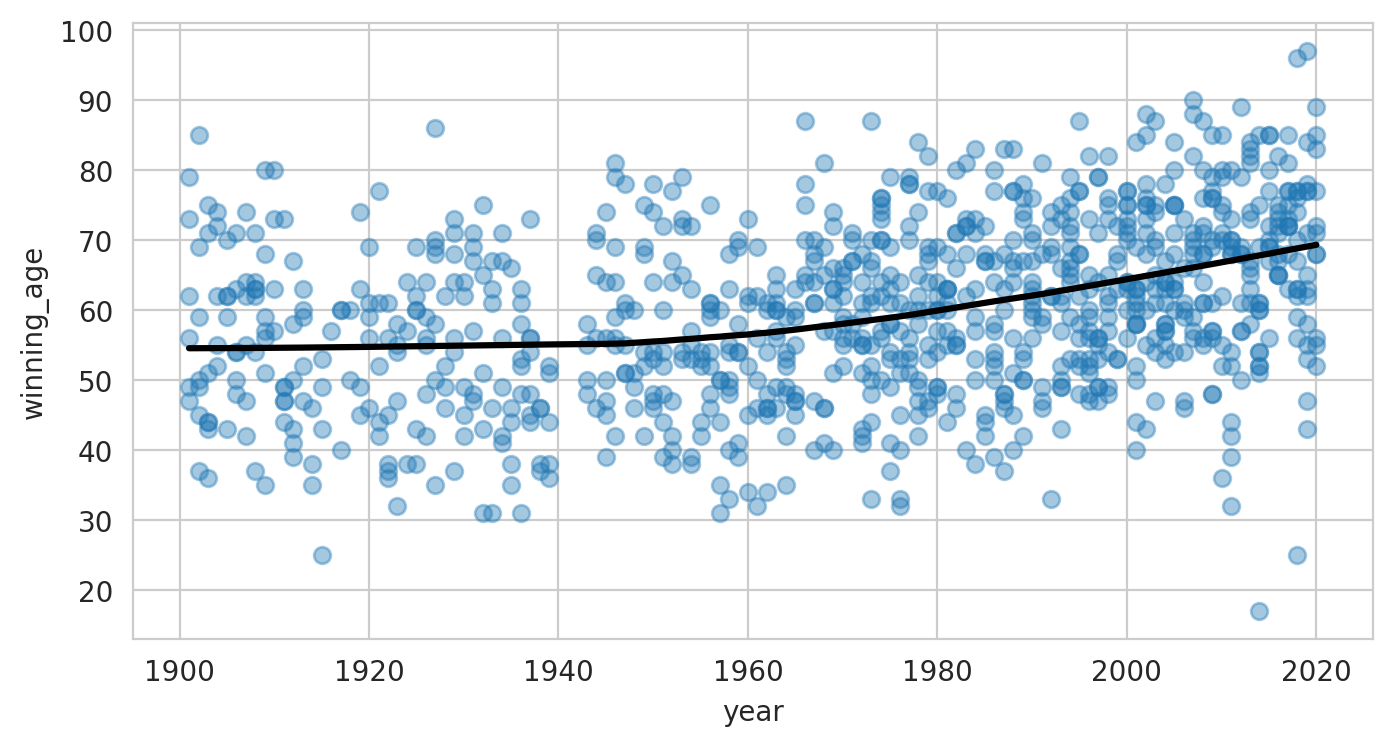

In [73]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.regplot(data=df_data,
             x='year',
            y='winning_age',
            lowess=True,
            scatter_kws={'alpha': 0.4},
            line_kws = {'color': 'black'})

plt.show()

## Winning Age Across the Nobel Prize Categories

Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories.

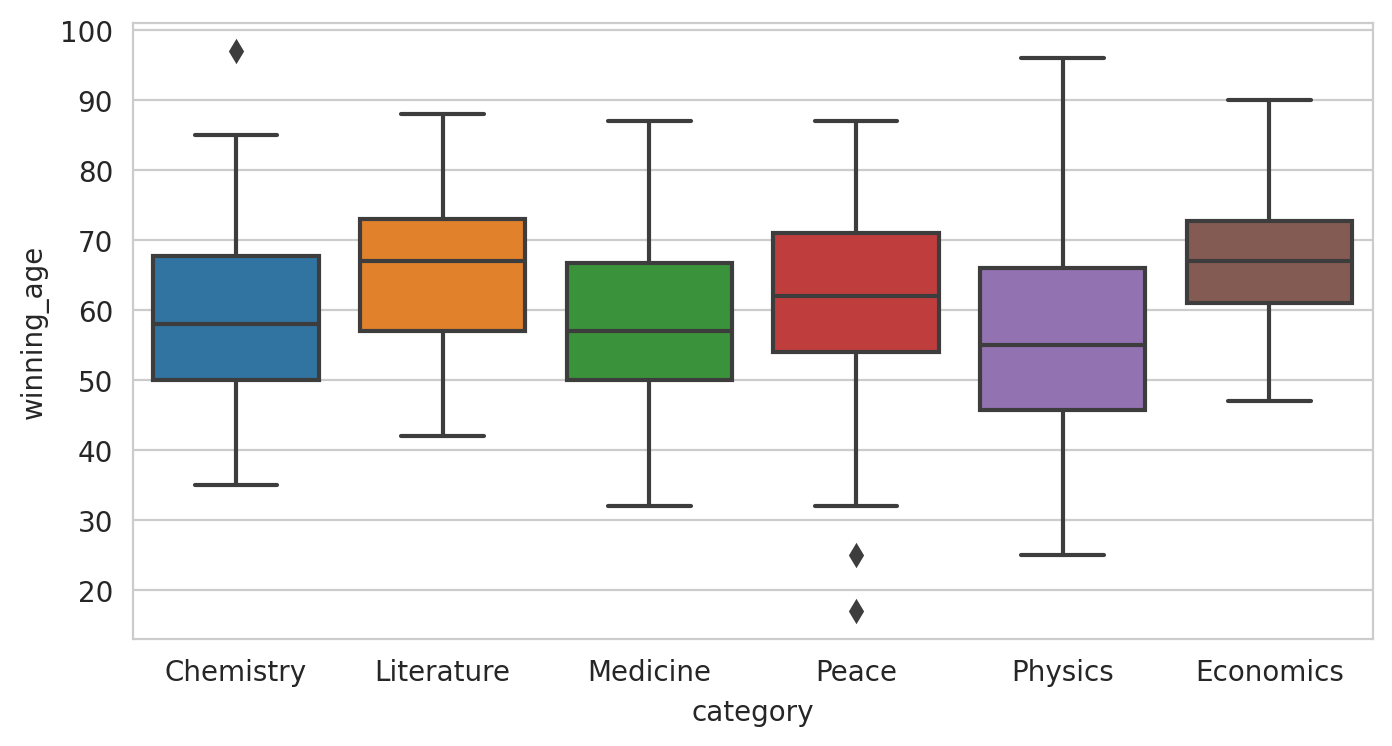

In [74]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
  sns.boxplot(data=df_data,
              x='category',
              y='winning_age')
plt.show()

* Use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category.
* Create another chart with Seaborn using `.lmplot()` to put all 6 categories on the same chart with the `hue` parameter.

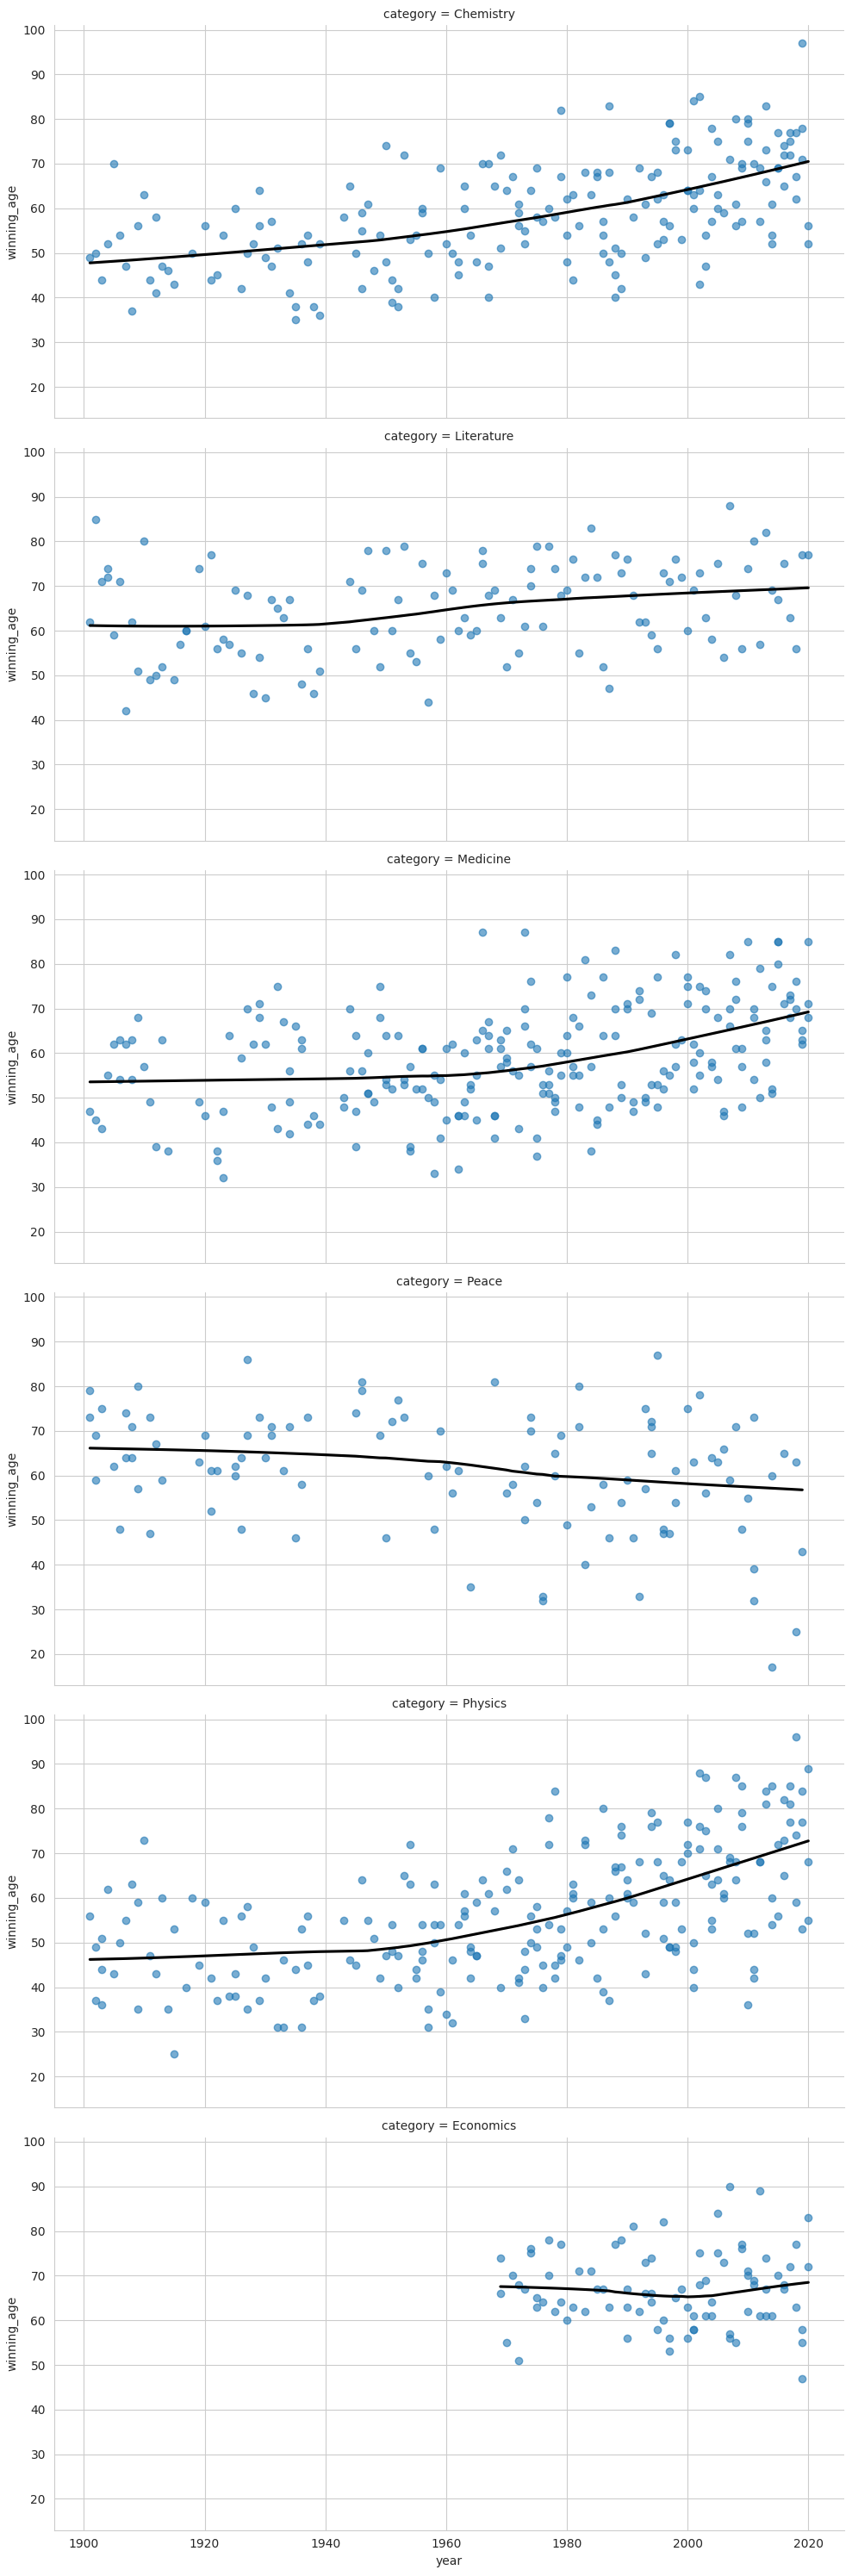

In [75]:
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
             x='year',
             y='winning_age',
             row='category',
             lowess=True,
             scatter_kws={'alpha': 0.6},
             line_kws={'color': 'black'},
             aspect=2)
plt.show()

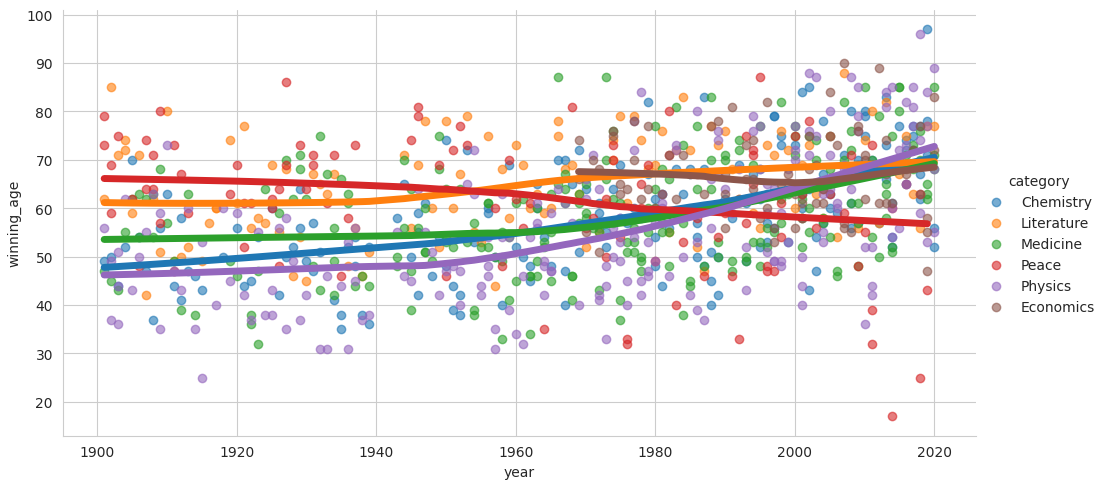

In [76]:
with sns.axes_style('whitegrid'):
  sns.lmplot(data=df_data,
             x='year',
             y='winning_age',
             hue='category',
             lowess=True,
             scatter_kws={'alpha': 0.6},
             line_kws={'linewidth': 5},
             aspect=2)
plt.show()